### 소스코드  : 중고차 가격 예측 모델 참고
- https://ebbnflow.tistory.com/140?category=850456
- https://ebbnflow.tistory.com/141?category=850456

In [635]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [636]:
data = pd.read_csv('sp_earn.csv')
data = data.drop(['번호'],axis=1)
data.head()

,시도,시군구,품목,부부 가족 경영규모,평균투자비(3년합계),연간운영비/년(운영),평균수입/년(부부인건비 포함),평균농지가격(3.3㎡)
0,경상남도,합천군,과일과채류 > 딸기 > 딸기(시설딸기),3300(㎡),22000000(원),68000000(원),25000000(원),2500(원)/50000(원)
1,경상남도,합천군,조미채소류 > 마늘 > 마늘,4000(㎡),17000000(원),23000000(원),12000000(원),2500(원)/50000(원)
2,경상남도,합천군,조미채소류 > 양파 > 양파(일반),4000(㎡),13000000(원),22000000(원),10000000(원),2500(원)/50000(원)
3,경상남도,남해군,조미채소류 > 마늘 > 마늘,1000(㎡),23700000(원),5614138(원),5940734(원),911(원)/36308(원)
4,경상남도,고성군,과일과채류 > 토마토 > 토마토(시설),4000(㎡),200000000(원),60000000(원),120000000(원),2000(원)/100000(원)


In [637]:
# data.shape
# print(data.columns)
print(data.iloc[:,[2]])

                        품목
0    과일과채류 > 딸기 > 딸기(시설딸기)
1          조미채소류 > 마늘 > 마늘
2      조미채소류 > 양파 > 양파(일반)
3          조미채소류 > 마늘 > 마늘
4    과일과채류 > 토마토 > 토마토(시설)
..                     ...
742      산채류 > 더덕 > 더덕(일반)
743    약용작물류 > 황기 > 황기(일반)
744  약용작물류 > 산야초 > 산야초(일반)
745        약용작물류 > 인삼 > 인삼
746         콩류 > 콩 > 콩(일반)

[747 rows x 1 columns]


In [638]:
#데이터 전처리
data['품목'] = data['품목'].astype(str).str.rpartition(sep='>')[2].str.strip()
data['품목'] = data['품목'].str.partition(sep='(')[0].str.strip()
data['부부 가족 경영규모'] = data['부부 가족 경영규모'].str.partition(sep='(')[0].str.strip()
data['평균투자비(3년합계)'] = data['평균투자비(3년합계)'].str.partition(sep='(')[0].str.strip()
data['연간운영비/년(운영)'] = data['연간운영비/년(운영)'].str.partition(sep='(')[0].str.strip()
data['평균수입/년(부부인건비 포함)'] = data['평균수입/년(부부인건비 포함)'].str.partition(sep='(')[0].str.strip()
data['품목']

0       딸기
1       마늘
2       양파
3       마늘
4      토마토
      ... 
742     더덕
743     황기
744    산야초
745     인삼
746      콩
Name: 품목, Length: 747, dtype: object

In [639]:
c_data = data.copy(deep=True)
c_data =  c_data.drop(['평균투자비(3년합계)'], axis=1)
c_data =  c_data.drop(['시도'], axis=1)  #해결 못해서 drop
c_data =  c_data.drop(['시군구'], axis=1)
c_data =  c_data.drop(['평균농지가격(3.3㎡)'], axis=1)
c_data['면적당수입'] = c_data['평균수입/년(부부인건비 포함)'].astype(int) / c_data['부부 가족 경영규모'].astype(int)
print(c_data.shape)
c_data = c_data[c_data['품목'].astype(str) != '' ]
c_data = c_data[c_data['부부 가족 경영규모'].astype(int) != 0 ]
c_data = c_data[c_data['부부 가족 경영규모'].astype(int) < 2140000 ] #이상치제거
#c_data = c_data[c_data['평균투자비(3년합계)'].astype(int) != 0 ]
c_data = c_data[c_data['연간운영비/년(운영)'].astype(int) != 0 ]
c_data = c_data[c_data['평균수입/년(부부인건비 포함)'].astype(int) != 0 ]
c_data = c_data[c_data['면적당수입'].astype(float) != 0 ]
print(c_data.shape)
c_data.tail()

(747, 5)
(725, 5)


,품목,부부 가족 경영규모,연간운영비/년(운영),평균수입/년(부부인건비 포함),면적당수입
742,더덕,5000,5000000,10000000,2000.000000
743,황기,12000,5000000,25000000,2083.333333
744,산야초,2000,10000000,50000000,25000.000000
745,인삼,15000,3000,2500,0.166667
746,콩,10000,2500,1000,0.100000


In [640]:
print(len(np.unique(list(c_data['품목']))))
np.unique(list(c_data['품목']))

127


array(['가을감자', '가지', '감', '감귤', '감자', '갓', '건고추', '고구마', '고설딸기', '고추',
       '곤드레나물', '곰취나물', '곶감', '과수', '구기자', '기타', '꽈리고추', '노지수박', '노지포도',
       '느타리버섯', '단호박', '당근', '대봉감', '대추', '대파', '대홍', '더덕', '덩굴강낭콩',
       '도라지', '돌산갓', '두릅', '딸기', '땅콩', '마늘', '매실', '메론', '묘목', '무화과',
       '미나리', '반시', '밤', '밤호박', '방울토마토', '방풍', '배', '배추', '버섯', '벼',
       '복분자', '브로코리', '블루베리', '비가림감귤', '사과', '산마늘', '산야초', '산채류', '상추',
       '생강', '생고사리', '세발나물', '수박', '시금치', '시설가지', '시설구기자', '시설오이', '시설채소',
       '시설호박', '쌀', '쌈채', '쌈채소', '쑥', '아로니아', '알로에', '애호박', '양배추', '양봉꿀',
       '양송이', '양채류', '양파', '연근', '오디', '오미자', '오이', '옥수수', '울금', '원예',
       '월동무', '유자', '인삼', '일반계', '일반미', '일반부추', '일반율무', '잎들깨', '자두', '장미',
       '절임배추', '조생양파', '쥬키니호박', '쪽파', '찰옥수수', '참다래', '참외', '천혜향', '청상추',
       '청초', '청포도', '체리', '취나물', '친환경 제철 꾸러미', '콩', '털복숭아', '토마토', '파프리카',
       '포도', '표고버섯', '풋고추', '풋마늘', '하우스감귤', '한라봉', '한우', '호박', '홍고추',
       '홍삼포크', '화훼', '황기', '후지'], dtype='<U10')

In [641]:
c_data['부부 가족 경영규모'] = c_data['부부 가족 경영규모'].astype(int)
#c_data['평균투자비(3년합계)'] = c_data['평균투자비(3년합계)'].astype(int)
c_data['연간운영비/년(운영)'] = c_data['연간운영비/년(운영)'].astype(int)
c_data['평균수입/년(부부인건비 포함)'] = c_data['평균수입/년(부부인건비 포함)'].astype(int)
c_data['면적당수입'] = c_data['면적당수입'].astype(float).round(2)
c_data.dtypes

품목                   object
부부 가족 경영규모            int32
연간운영비/년(운영)           int32
평균수입/년(부부인건비 포함)      int32
면적당수입               float64
dtype: object

In [642]:
#c_data['시도'] = pd.Categorical(c_data['시도'])
#c_data['시군구'] = pd.Categorical(c_data['시군구'])

In [643]:
c_data = pd.get_dummies(c_data, prefix_sep='_', drop_first=True)
print(c_data.shape)
c_data

(725, 130)


,부부 가족 경영규모,연간운영비/년(운영),평균수입/년(부부인건비 포함),면적당수입,품목_가지,품목_감,품목_감귤,품목_감자,품목_갓,품목_건고추,...,품목_풋마늘,품목_하우스감귤,품목_한라봉,품목_한우,품목_호박,품목_홍고추,품목_홍삼포크,품목_화훼,품목_황기,품목_후지
0,3300,68000000,25000000,7575.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4000,23000000,12000000,3000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4000,22000000,10000000,2500.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,5614138,5940734,5940.73,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4000,60000000,120000000,30000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,5000,5000000,10000000,2000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,12000,5000000,25000000,2083.33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
744,2000,10000000,50000000,25000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,15000,3000,2500,0.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


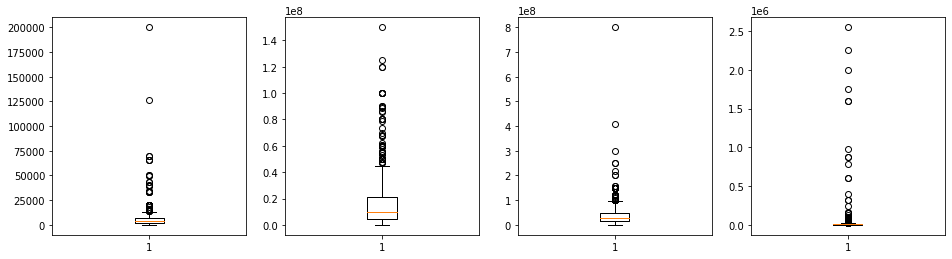

In [644]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
ax[0].boxplot(list(c_data['부부 가족 경영규모']))
ax[1].boxplot(list(c_data['연간운영비/년(운영)']))
ax[2].boxplot(list(c_data['평균수입/년(부부인건비 포함)']))
ax[3].boxplot(list(c_data['면적당수입']))
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0

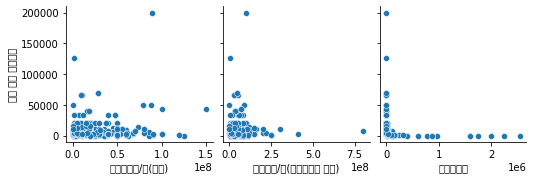

In [645]:
#c_data.iloc[:,[0,1,2]]
#ax = plt.subplots(figsize=(2, 16))
#ax = sns.pairplot(data=c_data, x_vars=c_data.iloc[:,[2]], y_vars=c_data['부부 가족 경영규모'])
sns.pairplot(data=c_data, x_vars=['연간운영비/년(운영)','평균수입/년(부부인건비 포함)', '면적당수입'], y_vars=['부부 가족 경영규모'])
plt.show()

In [646]:
y = c_data.iloc[:,[0]].to_numpy()
c_data = c_data.drop(columns=['부부 가족 경영규모'])

In [647]:
x = c_data
w = c_data.iloc[:,[0]]
e = c_data.iloc[:,[1]]
r = c_data.iloc[:,[2]]
# columns = c_data.columns
#
# scaler = preprocessing.MinMaxScaler()
# tmp = scaler.fit_transform(x)
# c_data = pd.DataFrame(tmp)
# c_data.columns = columns
#
x = c_data.to_numpy()
x

array([[6.80000e+07, 2.50000e+07, 7.57576e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.30000e+07, 1.20000e+07, 3.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+07, 1.00000e+07, 2.50000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+07, 5.00000e+07, 2.50000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.00000e+03, 2.50000e+03, 1.70000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.50000e+03, 1.00000e+03, 1.00000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [648]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=0)
x_train.shape

(580, 129)

In [649]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [650]:
print('Train dats\'s Accuracy : ', format(lr.score(x_train, y_train)))

y_train

Train dats's Accuracy :  0.4392410598192438


array([[  2988],
       [  3000],
       [   792],
       [  2644],
       [  5940],
       [  3000],
       [  4800],
       [  1650],
       [  4950],
       [ 10000],
       [   600],
       [  3960],
       [  7000],
       [  1000],
       [  7920],
       [  2000],
       [  3600],
       [ 10000],
       [ 10000],
       [ 10000],
       [  3300],
       [  2000],
       [  2310],
       [  4500],
       [  1000],
       [  8000],
       [  1000],
       [  3305],
       [  3300],
       [  3000],
       [ 20000],
       [ 20000],
       [  5000],
       [ 12500],
       [  1980],
       [  3300],
       [  5850],
       [  2000],
       [  1800],
       [  1070],
       [ 10000],
       [  4400],
       [  1000],
       [  3300],
       [  1980],
       [  8200],
       [ 10000],
       [  3300],
       [  1975],
       [  3000],
       [  4800],
       [  3300],
       [  4500],
       [  3000],
       [  4000],
       [  9166],
       [  5000],
       [  2700],
       [  6000

In [651]:
y_predict = lr.predict(x_test)
print('Test dats\'s Accuracy : ', format(lr.score(x_test, y_test)))
print('Test dats\'s Accuracy : ', format(r2_score(y_test, lr.predict(x_test))))

Test dats's Accuracy :  -4.969778371759945e+27
Test dats's Accuracy :  -4.969778371759945e+27


In [652]:
mean_absolute_error(y_test, y_predict)

7.899441658103048e+16

In [653]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=42, criterion='mae')
rfr.fit(x_train, y_train)


<ipython-input-653-69819895e5d4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor(criterion='mae', n_estimators=50, random_state=42)

In [654]:
print('Train dats\'s Accuracy : ', format(rfr.score(x_train, y_train)))

Train dats's Accuracy :  0.9384773522847314


In [655]:
y_predict = rfr.predict(x_test)
print('Test dats\'s Accuracy : ', format(rfr.score(x_test, y_test)))
print('Test dats\'s Accuracy : ', format(r2_score(y_test, rfr.predict(x_test))))

Test dats's Accuracy :  0.9123056776192513
Test dats's Accuracy :  0.9123056776192513


array([[1.26000e+06, 1.20000e+07, 6.06061e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.00000e+06, 1.50000e+07, 3.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.20000e+07, 1.00000e+07, 1.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+07, 3.00000e+07, 6.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.20000e+07, 4.00000e+07, 2.00000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.00000e+06, 1.50000e+07, 4.54545e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])